In [31]:
import pandas as pd
import numpy as np

#Import Machine Learning Packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

##Plotting the Confusion Matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib notebook

In [32]:
df = pd.read_excel('Data Prep AC.xlsx')
df.head()

,Target Index,Predictor,value_clean,line_num,line_placement,file_sum,normalized_value,nchars,nwords,follows_na,before_na
0,1,Sales of Machinery Energy & Transportation,42676.0,1,0.04,189074.74,0.938718,43,6,1,0
1,2,Revenues of Financial Products,2786.0,2,0.08,189074.74,0.061282,30,4,0,0
2,3,Total sales and revenues,45462.0,3,0.12,189074.74,1.000000,24,4,0,1
3,4,Cost of goods sold,31049.0,4,0.16,189074.74,0.682966,18,4,1,0
4,7,Selling general and administrative expenses,5177.0,5,0.20,189074.74,0.113875,44,5,0,0


In [33]:
#df.Predictor = df.Predictor.str.lower().str.split()

In [34]:
df.head()

,Target Index,Predictor,value_clean,line_num,line_placement,file_sum,normalized_value,nchars,nwords,follows_na,before_na
0,1,Sales of Machinery Energy & Transportation,42676.0,1,0.04,189074.74,0.938718,43,6,1,0
1,2,Revenues of Financial Products,2786.0,2,0.08,189074.74,0.061282,30,4,0,0
2,3,Total sales and revenues,45462.0,3,0.12,189074.74,1.000000,24,4,0,1
3,4,Cost of goods sold,31049.0,4,0.16,189074.74,0.682966,18,4,1,0
4,7,Selling general and administrative expenses,5177.0,5,0.20,189074.74,0.113875,44,5,0,0


In [35]:
len(df)

1176

In [36]:
df2 = df.drop(['Target Index', 'Predictor'], axis=1)
df2.head()

,value_clean,line_num,line_placement,file_sum,normalized_value,nchars,nwords,follows_na,before_na
0,42676.0,1,0.04,189074.74,0.938718,43,6,1,0
1,2786.0,2,0.08,189074.74,0.061282,30,4,0,0
2,45462.0,3,0.12,189074.74,1.000000,24,4,0,1
3,31049.0,4,0.16,189074.74,0.682966,18,4,1,0
4,5177.0,5,0.20,189074.74,0.113875,44,5,0,0


## Represent/Encode Text

In [37]:
tfidf = TfidfVectorizer(sublinear_tf=False, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Predictor).toarray()
labels = df['Target Index']
print (features.shape)

predictors = features
target = labels

(1176, 260)


In [38]:
(predictors.shape)

(1176, 260)

In [39]:
len(df['value_clean'])

1176

In [40]:
x1 = pd.DataFrame(predictors)
x1.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.375599,0.0,0.397959,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df3 = pd.concat([x1, df2], axis=1)
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,259,value_clean,line_num,line_placement,file_sum,normalized_value,nchars,nwords,follows_na,before_na
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,42676.0,1,0.04,189074.74,0.938718,43,6,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,2786.0,2,0.08,189074.74,0.061282,30,4,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,45462.0,3,0.12,189074.74,1.000000,24,4,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,31049.0,4,0.16,189074.74,0.682966,18,4,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.375599,0.0,0.397959,0.0,...,0.0,5177.0,5,0.20,189074.74,0.113875,44,5,0,0


In [42]:
predictors = np.array(df3)

In [43]:
labels[550]

0

## Build Train/Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.15)

In [45]:
X_train

array([[  0.,   0.,   0., ...,   5.,   0.,   0.],
       [  0.,   0.,   0., ...,   5.,   1.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   1.],
       ..., 
       [  0.,   0.,   0., ...,  10.,   0.,   1.],
       [  0.,   0.,   0., ...,   6.,   0.,   0.],
       [  0.,   0.,   0., ...,   2.,   0.,   0.]])

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Training accuracy

In [47]:
predicted = lr.predict(X_train)
accuracy_score(predicted, y_train)

0.5335335335335335

### Test accuracy

In [48]:
predicted = lr.predict(X_test)
accuracy_score(predicted, y_test)

0.4576271186440678

## Build Random Forest Classifier

In [62]:
#We got these hyperparameters from the grid search below. 

clf = RandomForestClassifier(n_jobs=2, bootstrap=False, max_depth=20, n_estimators=1000, max_features='sqrt'
                            ,min_samples_leaf=2, min_samples_split=5 )
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Compute Accuracy and Confustion Matrix on training data

In [63]:
predicted = clf.predict(X_train)
predicted = pd.DataFrame(predicted)

accuracy_score(predicted, y_train)

0.96596596596596596

<IPython.core.display.Javascript object>


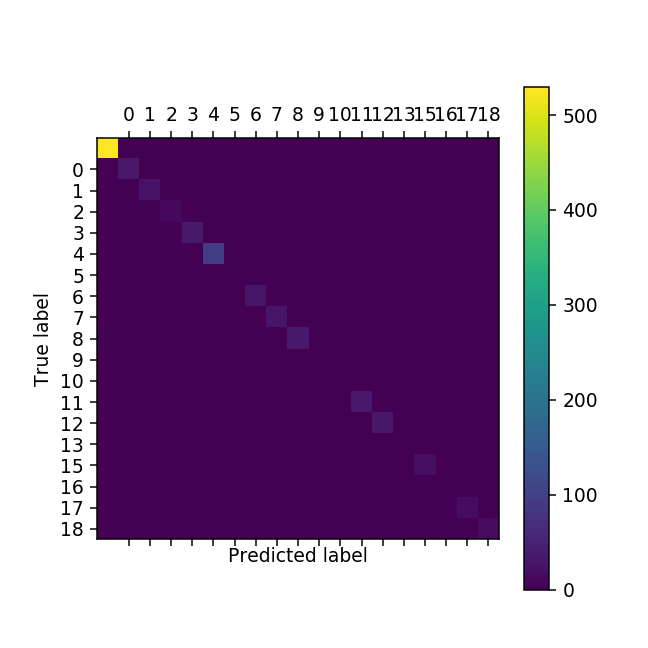

In [64]:
cm = confusion_matrix(predicted, y_train)
labels = np.unique(labels).tolist()

plt.matshow(cm)
x = range(1,19)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(x, labels)
plt.yticks(x, labels)
plt.show()

In [72]:
headers = ["name", "score"]
values = sorted(zip(pd.DataFrame(X_train).columns, clf.feature_importances_), key=lambda x: x[1] * -1)
print(values, headers)

[(262, 0.12607667147115639), (261, 0.12312298212383543), (264, 0.04449946545514525), (265, 0.040816080818056065), (99, 0.03081395229811712), (260, 0.028661378535871172), (266, 0.026160746245460938), (131, 0.025676121498598041), (54, 0.024565681000031495), (218, 0.024516250504170202), (263, 0.022912210532685058), (173, 0.022569360642017696), (157, 0.016927166499240129), (6, 0.016721694998987225), (177, 0.016662499406732267), (204, 0.012449157989422326), (226, 0.011715366140160749), (52, 0.011171308751746312), (161, 0.010490906202707897), (56, 0.010434465908645475), (221, 0.010418951689700463), (175, 0.01039295494433275), (53, 0.010134627434201496), (240, 0.0099089114936821952), (96, 0.0098414222194049567), (119, 0.0090804788224778683), (14, 0.008848926939979955), (141, 0.008334051111081037), (118, 0.0081971653380479396), (142, 0.0077684158235791865), (244, 0.0072690511989629914), (205, 0.0070035769353569109), (247, 0.0066577539816218383), (102, 0.0062511755756295825), (8, 0.006242400039

## Compute Accuracy and Confusion Matrix on test set

In [52]:
predicted = clf.predict(X_test)
predicted = pd.DataFrame(predicted)

accuracy_score(predicted, y_test)

0.89830508474576276

In [53]:
cm = confusion_matrix(predicted, y_test)
labels = np.unique(labels).tolist()

In [54]:
len(labels)

19

<IPython.core.display.Javascript object>


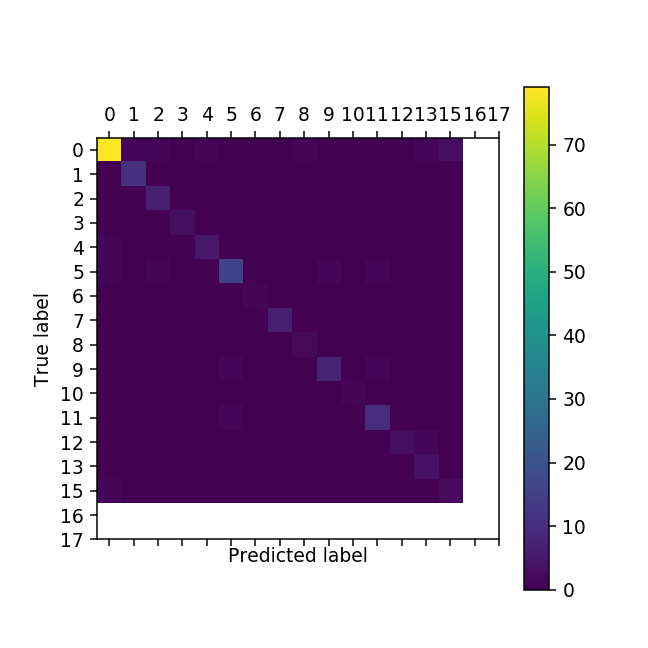

In [55]:

plt.matshow(cm)
x = range(0,17)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(x, labels)
plt.yticks(x, labels)
#plt.figure(figsize=(13,14))
plt.show()

# Perform Grid Search In order to find the best Hyperparameters 

In [56]:
#RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
#            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=2, min_samples_split=5,
#            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
#            oob_score=False, random_state=None, verbose=0,
#            warm_start=False)

#bootstrap = [False]
#max_depth = [10, 20, 60, 70, 100, None]
#max_features = ['auto', 'sqrt']
#min_samples_leaf = [1, 2, 4]
#min_samples_split = [2, 5, 10]
#n_estimators = [200, 400, 800, 1400]

bootstrap = [False]
max_depth = [20]
max_features = ['sqrt']
min_samples_leaf = [2]
min_samples_split = [5]
n_estimators = [200]

                   
for bootstrapMethod in bootstrap:
    for max_depthMethod in max_depth:
        for max_featuresMethod in max_features:
            for min_samples_leafMethod in min_samples_leaf:
                for min_samples_splitMethod in min_samples_split:
                    for n_estimatorsMethod in n_estimators:
                            clf = RandomForestClassifier(n_jobs=2, bootstrap = bootstrapMethod, 
                                                        max_depth = max_depthMethod, max_features = max_featuresMethod, 
                                                        min_samples_leaf = min_samples_leafMethod, min_samples_split = min_samples_splitMethod, 
                                                        n_estimators = n_estimatorsMethod)
                            clf.fit(X_train,y_train)
                            print(' bootstrap '+ str(bootstrapMethod) +' max_depth '+ str(max_depthMethod)+' max_features '+ str(max_featuresMethod)+' min_samples_leaf '+ str(min_samples_leafMethod)+' min_samples_split '+ str(min_samples_splitMethod)+' n_estimators '+ str(n_estimatorsMethod)+' Test AUC ' + str(accuracy_score(pd.DataFrame(clf.predict(X_test)), y_test)))

 bootstrap False max_depth 20 max_features sqrt min_samples_leaf 2 min_samples_split 5 n_estimators 200 Test AUC 0.898305084746


## Train on all Data

Now that we have hyperparameters that are not overfitting(ish), we are gonna train on all the data. 

In [57]:
clf.fit(predictors,target)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predict Test Cases

In [58]:
#clf.predict(tfidf.transform(['Net Earnings']))[0]

In [59]:
#clf.predict(tfidf.transform(['Cost of Sold']))[0]

In [60]:
#clf.predict(tfidf.transform(['income expense']))[0]